In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

from sklearn.linear_model import LogisticRegression

In [5]:
# Logestic regression

train = pd.read_csv("train.csv")

# train.head()

desired_ratio=0.5

# Get the indices per target value
class_0 = train[train.target == 0].index
class_1 = train[train.target == 1].index

# Get original number of records per target value
number_of_samples_0 = len(train.loc[class_0])
print('Number of samples with target 0',number_of_samples_0)

number_of_samples_1 = len(train.loc[class_1])
print('Number of samples with target 1',number_of_samples_1)


# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_ratio)*number_of_samples_1)/(number_of_samples_0*desired_ratio)
print('undersampling_rate',undersampling_rate)
undersampled_count_0 = int(undersampling_rate*number_of_samples_0)
print('number of rows selected',undersampled_count_0)

print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_count_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(class_0, random_state=37, n_samples=undersampled_count_0)

# Construct list with remaining indices
index_list = list(undersampled_idx) + list(class_1)

# Dropping all the remaining values apart from selected samples in training dataset
train1 = train.loc[index_list].reset_index(drop=True)

train1.shape

X = train1[train1.columns[2:]]
Y = train1[train1.columns[1:2]]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


Number of samples with target 0 573518
Number of samples with target 1 21694
undersampling_rate 0.037826188541597645
number of rows selected 21694
Rate to undersample records with target=0: 0.037826188541597645
Number of records with target=0 after undersampling: 21694


array([[3371, 2096],
       [2348, 3032]])

Text(0.5,257.44,'Predicted label')

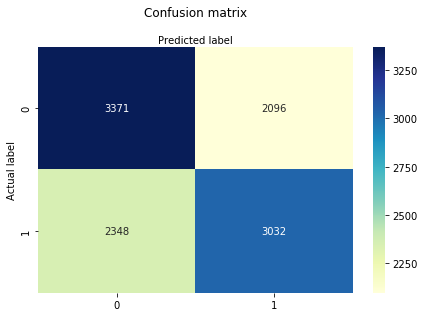

In [6]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [7]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.5903014658430903
Precision: 0.5912636505460218
Recall: 0.5635687732342007


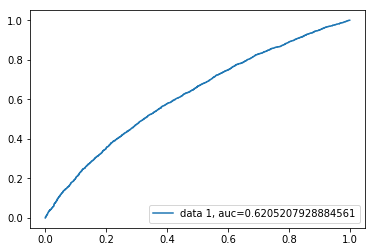

In [8]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()